**Author:** Kaetlyn Gibson

**Bio 399**
    
**Homework 7**

# Question 1

The importance of vaccination! Let’s examine what sort of impact vaccination can make on the outcome of a measles outbreak. Using the measles parameters I listed in the week 7 notebook (β= 1.5,γ= 0.125), along with the deterministic version of the SIR model, simulate a situation in which a portion of the population is vaccinated against the disease. You can do this by altering the proportion of the population that begins in the “Recovered” state. Plot SIR dynamics for vaccination rates of 0%, 10%, 50%, and 90%. Can you find the critical point at which measles can’t grow?

In [11]:
# import statements
import numpy as np
from scipy.integrate import odeint, quad # we will use this to solve ODE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# The SI model differential equations.
def SIR(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N -  gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [3]:
sns.set_style('darkgrid')

## R0 = 0 **(0%)**

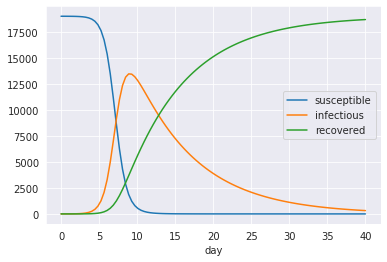

In [4]:
N = 19000  # Total population, N.
# Initial number of infected and susceptible individuals, I0 and R0.
I0 = 1
R0 = 0  # 0%
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0
# Initial conditions vector
y0 = S0, I0, R0
# Contact rate, beta 
beta = 1.5 
# recovery rate, gamma
d = 8
gamma = 1/d

# A grid of time points (in days)
t = np.linspace(0, d*5, 100)
# Integrate the SI equations over the time grid, t.
# this does the hard work for us
ret = odeint(SIR, y0, t, args=(N, beta, gamma))
S, I, R = ret.T  # divide through by N to get proportions
df = pd.DataFrame({"susceptible":S, "infectious":I, "recovered":R},index=t)
df.index.name="day"
df.plot()

## R0 = 1,900 **(10%)**

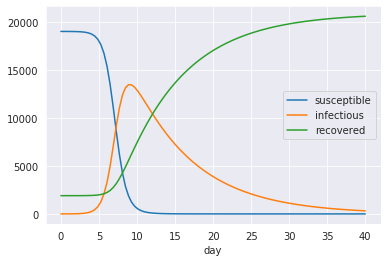

In [5]:
N = 19000  # Total population, N.
# Initial number of infected and unsusceptible individuals, I0 and R0.
I0 = 1
R0 = 19000*.1  # 10%
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0
# Initial conditions vector
y0 = S0, I0, R0
# Contact rate, beta 
beta = 1.5 
# recovery rate, gamma
d = 8
gamma = 1/d

# A grid of time points (in days)
t = np.linspace(0, d*5, 100)
# Integrate the SI equations over the time grid, t.
# this does the hard work for us
ret = odeint(SIR, y0, t, args=(N, beta, gamma))
S, I, R = ret.T  # divide through by N to get proportions
df = pd.DataFrame({"susceptible":S, "infectious":I, "recovered":R},index=t)
df.index.name="day"
df.plot()

## R0 = 9,500 **(50%)**

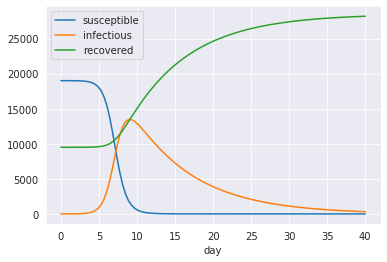

In [6]:
N = 19000  # Total population, N.
# Initial number of infected and unsusceptible individuals, I0 and R0.
I0 = 1
R0 = 19000*.5  # 50%
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0
# Initial conditions vector
y0 = S0, I0, R0
# Contact rate, beta 
beta = 1.5 
# recovery rate, gamma
d = 8
gamma = 1/d

# A grid of time points (in days)
t = np.linspace(0, d*5, 100)
# Integrate the SI equations over the time grid, t.
# this does the hard work for us
ret = odeint(SIR, y0, t, args=(N, beta, gamma))
S, I, R = ret.T  # divide through by N to get proportions
df = pd.DataFrame({"susceptible":S, "infectious":I, "recovered":R},index=t)
df.index.name="day"
df.plot()

## R0 = 17,100 **(90%)**

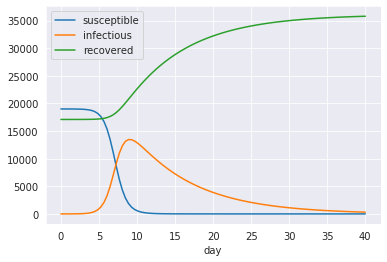

In [7]:
N = 19000  # Total population, N.
# Initial number of infected and unsusceptible individuals, I0 and R0.
I0 = 1
R0 = 19000*.9  # 90%
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0
# Initial conditions vector
y0 = S0, I0, R0
# Contact rate, beta 
beta = 1.5 
# recovery rate, gamma
d = 8
gamma = 1/d

# A grid of time points (in days)
t = np.linspace(0, d*5, 100)
# Integrate the SI equations over the time grid, t.
# this does the hard work for us
ret = odeint(SIR, y0, t, args=(N, beta, gamma))
S, I, R = ret.T  # divide through by N to get proportions
df = pd.DataFrame({"susceptible":S, "infectious":I, "recovered":R},index=t)
df.index.name="day"
df.plot()

# Question 2

The SEIR model is a slightly more complex compartment model of contagion in which some portion of the population has been Exposed, but not yet infectious. Individuals move from Susceptible to Exposed at the same rate as S->I in the SIR model, but now there is an incubation time α which determines the rate at which individuals move from Exposed to Infectious. The dynamics of the system look like this:

(1)  ∂S/∂t = −βSI/N       

(2)  ∂E/∂t = (βSI/N)−αE  

(3)  ∂I/∂t = αE−γI      

(4)  ∂R/∂t = γI           

Code up these dynamics and use the deterministic strategy to plot the SEIR model. Do this for both the measle and COVID parameter sets assuming the incubation rate is α= 0.2 corresponding to an average of 5 day incubation period.

In [8]:
# The SEIR model differential equations.
def SEIR(y, t, N, a, beta, gamma):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - a * E
    dIdt = a * E -  gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

## Measles

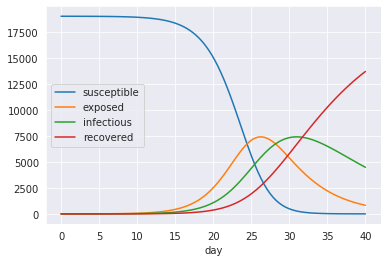

In [9]:
N = 19000  # Total population, N.
# Initial number of infected and unsusceptible individuals, I0 and R0.
I0 = 1
R0 = 0  # 0%
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0
# Initial number of exposed individuals, E0 
E0 = 0
# Initial conditions vector
y0 = S0, E0, I0, R0
# recovery rate, gamma
d = 8
gamma = 1/d
# Contact rate, beta 
beta = 12 * gamma
# incubation time, a
a = 0.2

# A grid of time points (in days)
t = np.linspace(0, d*5, 100)
# Integrate the SI equations over the time grid, t.
# this does the hard work for us
ret = odeint(SEIR, y0, t, args=(N, a, beta, gamma))
S, E, I, R = ret.T  # divide through by N to get proportions
df = pd.DataFrame({"susceptible":S, "exposed":E, "infectious":I, "recovered":R},index=t)
df.index.name="day"
df.plot()

## COVID-19

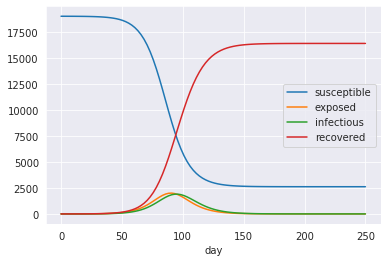

In [10]:
R0 = 2.3
d = 5
gamma = 1 / d
beta = R0 * gamma 

N = 19000 # population size
I0 = 1
R0 = 0
E0 = 0
S0 = N - I0
y0 = S0, E0, I0, R0
# incubation time, a
a = 0.2

# A grid of time points (in days)
t = np.linspace(0, d*50, 100)
# Integrate the SI equations over the time grid, t.
# this does the hard work for us
ret = odeint(SEIR, y0, t, args=(N, a, beta, gamma))
S, E, I, R = ret.T  # divide through by N to get proportions
df = pd.DataFrame({"susceptible":S, "exposed":E, "infectious":I, "recovered":R},index=t)
df.index.name="day"
df.plot()